# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

,Channel,Mean_Alert,Std_Alert,Mean_Drowsy,Std_Drowsy
0,1,0.120450,17.630071,-0.163686,10.802148
1,2,0.082160,17.209800,-0.163763,12.170468
2,3,0.052289,9.635932,-0.061430,9.706984
3,4,0.002035,30.798487,-0.113082,11.617223
4,5,0.022715,9.642534,-0.159155,11.707889
5,6,0.021788,26.476227,-0.154311,17.197473
6,7,0.019232,12.678096,-0.126242,9.635353
7,8,0.046900,8.752803,-0.070030,9.094665
8,9,0.023307,9.758593,-0.130595,11.230886
9,10,0.017935,9.891951,-0.138523,12.140691


## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

# Segregating the data into alert and drowsy states

In [15]:
import scipy.io

In [16]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

In [17]:
# Segregate the data into alert and drowsy states
alert_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 0, :]
drowsy_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 1, :]

In [18]:
# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning EEG Labels</h2>
    
</div>


In [19]:
labels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT7', 'FC3', 'FCZ', 'FC4', 'FT8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'T5', 'P3', 'PZ', 'P4', 'T6', 'O1', 'Oz', 'O2']

# Data Manipulation - Alert State

In [20]:
# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_alert_data = np.transpose(alert_data['EEGsample'], (0, 2, 1))

transposed_alert_data.shape

(1011, 384, 30)

In [21]:
# Concatenate all the samples together
Manipulated_Alert_Data = np.concatenate(transposed_alert_data, axis=0)

Manipulated_Alert_Data.shape

(388224, 30)

In [22]:
# Create a new dataframe with the concatenated EEG values
Manipulated_Alert_Data = pd.DataFrame(Manipulated_Alert_Data)

### Assigning Labels

In [23]:
Manipulated_Alert_Data.columns = labels

Manipulated_Alert_Data['substate'] = 0

In [24]:
Manipulated_Alert_Data_shape = Manipulated_Alert_Data.shape
print(Manipulated_Alert_Data_shape)

(388224, 31)


In [25]:
Manipulated_Alert_Data

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
0,4.080976,3.786023,8.346804,6.719097,8.357521,8.916676,6.862104,9.614278,8.955653,11.076102,...,4.477457,1.590643,8.856600,6.898189,3.846108,1.618809,1.528848,-1.199498,1.594009,0
1,5.363737,6.188060,8.691601,6.594982,7.950093,8.835506,7.987136,8.394441,7.126653,8.356511,...,2.415757,1.918520,7.423708,3.755487,1.427838,-0.657721,0.793796,-1.544962,1.900514,0
2,2.168923,1.727106,-0.010906,10.583628,2.440252,1.746089,1.159202,-1.002561,7.059705,1.720240,...,-4.692833,4.261903,3.151329,-1.637562,-5.816451,-8.913891,-1.451266,-4.319859,-4.644263,0
3,6.682761,4.633752,2.093427,16.253235,6.105603,3.943814,4.016592,2.393903,17.343024,6.441727,...,0.839859,2.543160,7.499411,4.182199,-0.059025,-0.736035,4.434387,3.438641,1.207515,0
4,9.795314,8.723788,10.936554,8.182007,8.306618,7.103265,7.980278,12.270826,9.309045,6.750704,...,2.970653,-0.216052,5.413562,5.600711,2.837383,4.172009,0.202442,1.743480,3.413565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,8.233965,0.275736,6.446871,5.908036,9.747110,11.439683,-1.685268,5.394103,5.898229,12.230832,...,-6.909897,-8.072416,-0.579174,5.365872,-2.507618,-7.071795,-5.722929,2.618950,-3.075700,0
388220,7.406664,9.878674,-3.062066,9.699165,12.825886,16.227294,11.658202,0.792909,8.312962,14.986136,...,-4.750323,-9.749710,0.661105,7.605404,0.084582,-4.264237,-3.538781,3.539202,-0.909379,0
388221,13.849187,15.022659,-0.428879,12.096121,18.726862,20.367732,21.341497,-0.920176,11.466241,19.145924,...,2.819010,-14.607244,1.367658,10.402462,6.190984,3.495143,-5.398682,3.006524,-0.195928,0
388222,16.960690,11.183629,8.472685,8.712444,17.208050,19.493375,19.953374,2.115628,10.656352,18.752221,...,9.265103,-15.256238,-1.057022,8.016603,8.461495,8.418237,-9.056400,0.705703,-0.641096,0


In [26]:
Manipulated_Alert_Data.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,0.120450,0.082160,0.052289,0.002035,0.022715,0.021788,0.019232,0.046900,0.023307,0.017935,...,0.021766,0.007225,-0.003592,0.019598,0.010883,0.033979,0.010209,-0.011278,0.016158,0.0
std,17.630093,17.209822,9.635944,30.798527,9.642547,26.476261,12.678112,8.752815,9.758606,9.891964,...,8.139659,7.684464,8.780677,9.051305,8.877557,7.612380,8.213531,8.012668,8.402200,0.0
min,-573.236473,-1299.322323,-179.743368,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-4.776408,-5.200087,-4.309381,-5.210375,-5.136774,-5.298737,-4.533854,-3.814357,-5.077397,-5.446187,...,-3.618430,-3.631967,-4.483550,-4.728144,-4.541708,-3.618739,-3.935085,-3.812024,-3.973197,0.0
50%,-0.075639,-0.078809,0.021210,-0.007062,-0.025080,-0.004596,0.032909,0.000847,0.002038,-0.015818,...,0.072676,0.064908,0.021311,0.014776,0.011861,0.067332,0.070167,0.027562,0.061650,0.0
75%,4.674139,5.061314,4.318260,5.122598,5.058932,5.269095,4.578348,3.898470,5.029046,5.397253,...,3.720945,3.728646,4.505347,4.764787,4.597949,3.740409,4.070610,3.884409,4.121255,0.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1116.638265,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,153.842957,148.846683,146.055474,0.0


### Manipulated Alert Data Visualizations

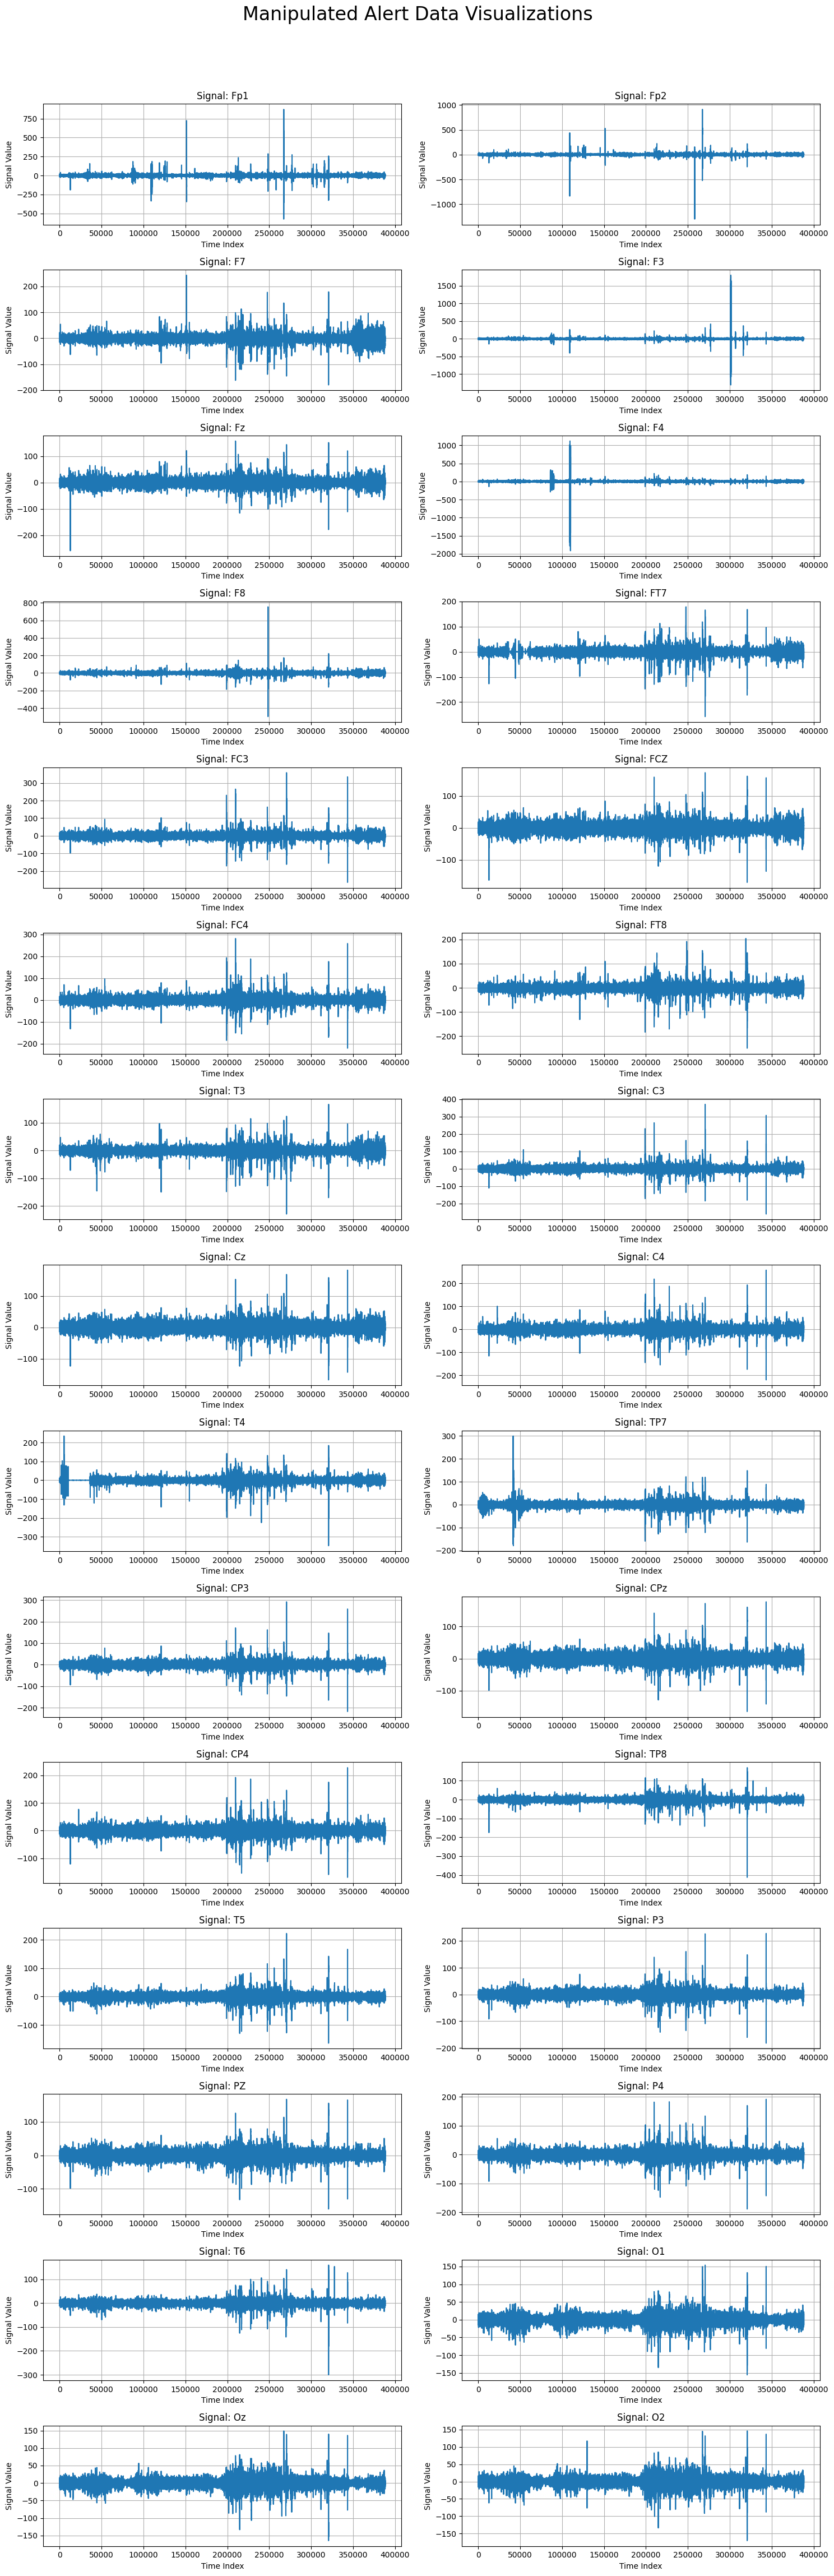

In [27]:
columns_of_interest = Manipulated_Alert_Data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_Alert_Data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Alert Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Data Manipulation - Drowsy State

In [28]:
# Load the alert data
drowsy_data = scipy.io.loadmat('drowsy_data.mat')

# Transpose the EEGsample for each sample
transposed_drowsy_data = np.transpose(drowsy_data['EEGsample'], (0, 2, 1))

transposed_drowsy_data.shape

(1011, 384, 30)

In [29]:
# Concatenate all the samples together
Manipulated_drowsy_data = np.concatenate(transposed_drowsy_data, axis=0)

Manipulated_drowsy_data.shape

(388224, 30)

In [30]:
# Create a new dataframe with the concatenated EEG values
Manipulated_drowsy_data = pd.DataFrame(Manipulated_drowsy_data)

### Assigning Labels

In [31]:
Manipulated_drowsy_data.columns = labels

Manipulated_drowsy_data['substate'] = 1

In [32]:
Manipulated_drowsy_data

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
0,-9.340455,-2.581835,0.605112,-1.951353,-1.691814,0.000079,3.330641,-0.191926,-4.416670,-1.147983,...,2.129284,-3.047745,-4.376038,-3.188374,-0.385878,1.875040,-5.343100,-3.923701,-2.074438,1
1,-9.297278,1.208397,1.506896,-2.264259,-0.276102,2.584222,6.163738,1.151379,-4.483509,0.162938,...,5.101435,-6.010214,-4.166642,-2.759660,1.960440,2.900005,-5.235632,-4.409118,-0.922046,1
2,-5.377346,4.373476,1.989039,0.960820,4.204186,7.833417,6.751105,1.460457,-1.914790,4.162968,...,4.944842,-5.937366,-2.171945,1.778525,4.798910,3.802374,-4.404817,-2.675341,1.579044,1
3,-0.387827,6.691171,5.519700,7.556678,9.908533,9.829516,7.316607,5.024432,4.905958,11.028363,...,7.509409,-2.738498,3.898276,9.131125,11.175130,7.386306,-0.541670,2.996915,6.289799,1
4,4.371176,8.625327,7.997311,13.974010,13.865399,12.207135,6.853086,7.709539,11.165707,16.520067,...,9.410449,0.360403,9.101561,13.200414,15.277298,6.949633,-0.142043,4.255927,8.020452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,6.868306,2.037630,10.935329,3.053171,2.061508,-2.051896,-6.980084,6.915801,1.292861,-2.156677,...,0.466622,1.703162,0.489967,-0.037224,-1.715912,1.355944,0.816035,0.522263,-0.399985,1
388220,3.248673,-3.479991,8.520732,-0.933774,-2.160580,-5.932663,-12.832424,4.543766,-2.418177,-6.189452,...,-1.080016,2.258167,-0.767202,-2.633476,-5.121715,-0.736463,0.412399,-0.159130,-2.200928,1
388221,5.805058,2.770440,8.983543,1.738981,-0.541900,-8.541175,-8.517280,3.491680,-1.389771,-5.822860,...,-3.365152,3.624552,0.280940,-3.084484,-4.691478,-3.197477,0.923831,1.341110,-1.338262,1
388222,7.142978,0.775242,9.888220,4.223264,0.790337,-6.479811,-12.121178,4.921120,0.083320,-4.330250,...,-2.798542,4.248466,1.042023,-2.643634,-3.409195,-2.482608,1.644079,1.565844,-0.301095,1


In [33]:
Manipulated_drowsy_data.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,-0.163686,-0.163763,-0.061430,-0.113082,-0.159155,-0.154311,-0.126242,-0.070030,-0.130595,-0.138523,...,-0.056785,-0.060255,-0.096036,-0.118028,-0.107124,-0.062159,-0.026352,-0.017755,-0.030039,1.0
std,10.802162,12.170483,9.706996,11.617238,11.707904,17.197495,9.635365,9.094677,11.230901,12.140707,...,7.689604,8.109370,9.909476,10.804110,9.976411,8.179171,10.028629,9.505392,9.875288,0.0
min,-145.269631,-308.117318,-208.160484,-163.826844,-100.695726,-1125.136706,-161.823860,-212.758350,-141.973257,-103.806592,...,-125.570649,-137.921451,-137.418180,-98.038632,-86.178014,-96.573654,-111.033889,-82.105822,-104.977015,1.0
25%,-6.007234,-6.190237,-5.506541,-6.873797,-7.121843,-6.880179,-5.572226,-5.258330,-6.870947,-7.413322,...,-4.403696,-4.577018,-5.870384,-6.373962,-5.926993,-4.564648,-5.246814,-5.074907,-5.180213,1.0
50%,-0.250570,-0.238106,-0.155144,-0.243064,-0.282707,-0.213323,-0.153487,-0.125998,-0.251318,-0.285557,...,0.009052,0.029471,-0.095410,-0.139133,-0.096802,0.075492,0.132464,0.088170,0.098328,1.0
75%,5.547856,5.772156,5.227754,6.460921,6.635637,6.517604,5.291838,5.014352,6.449208,6.957582,...,4.366657,4.599496,5.674530,6.103163,5.702462,4.655450,5.479959,5.229882,5.376959,1.0
max,121.393937,273.098587,172.740818,188.832426,88.826183,1294.240965,108.960785,175.284422,149.601643,105.144671,...,86.404769,111.799695,99.369526,86.730979,91.346750,104.784533,179.167203,149.156242,149.996483,1.0


### Manipulated Drowsy Data Visualizations

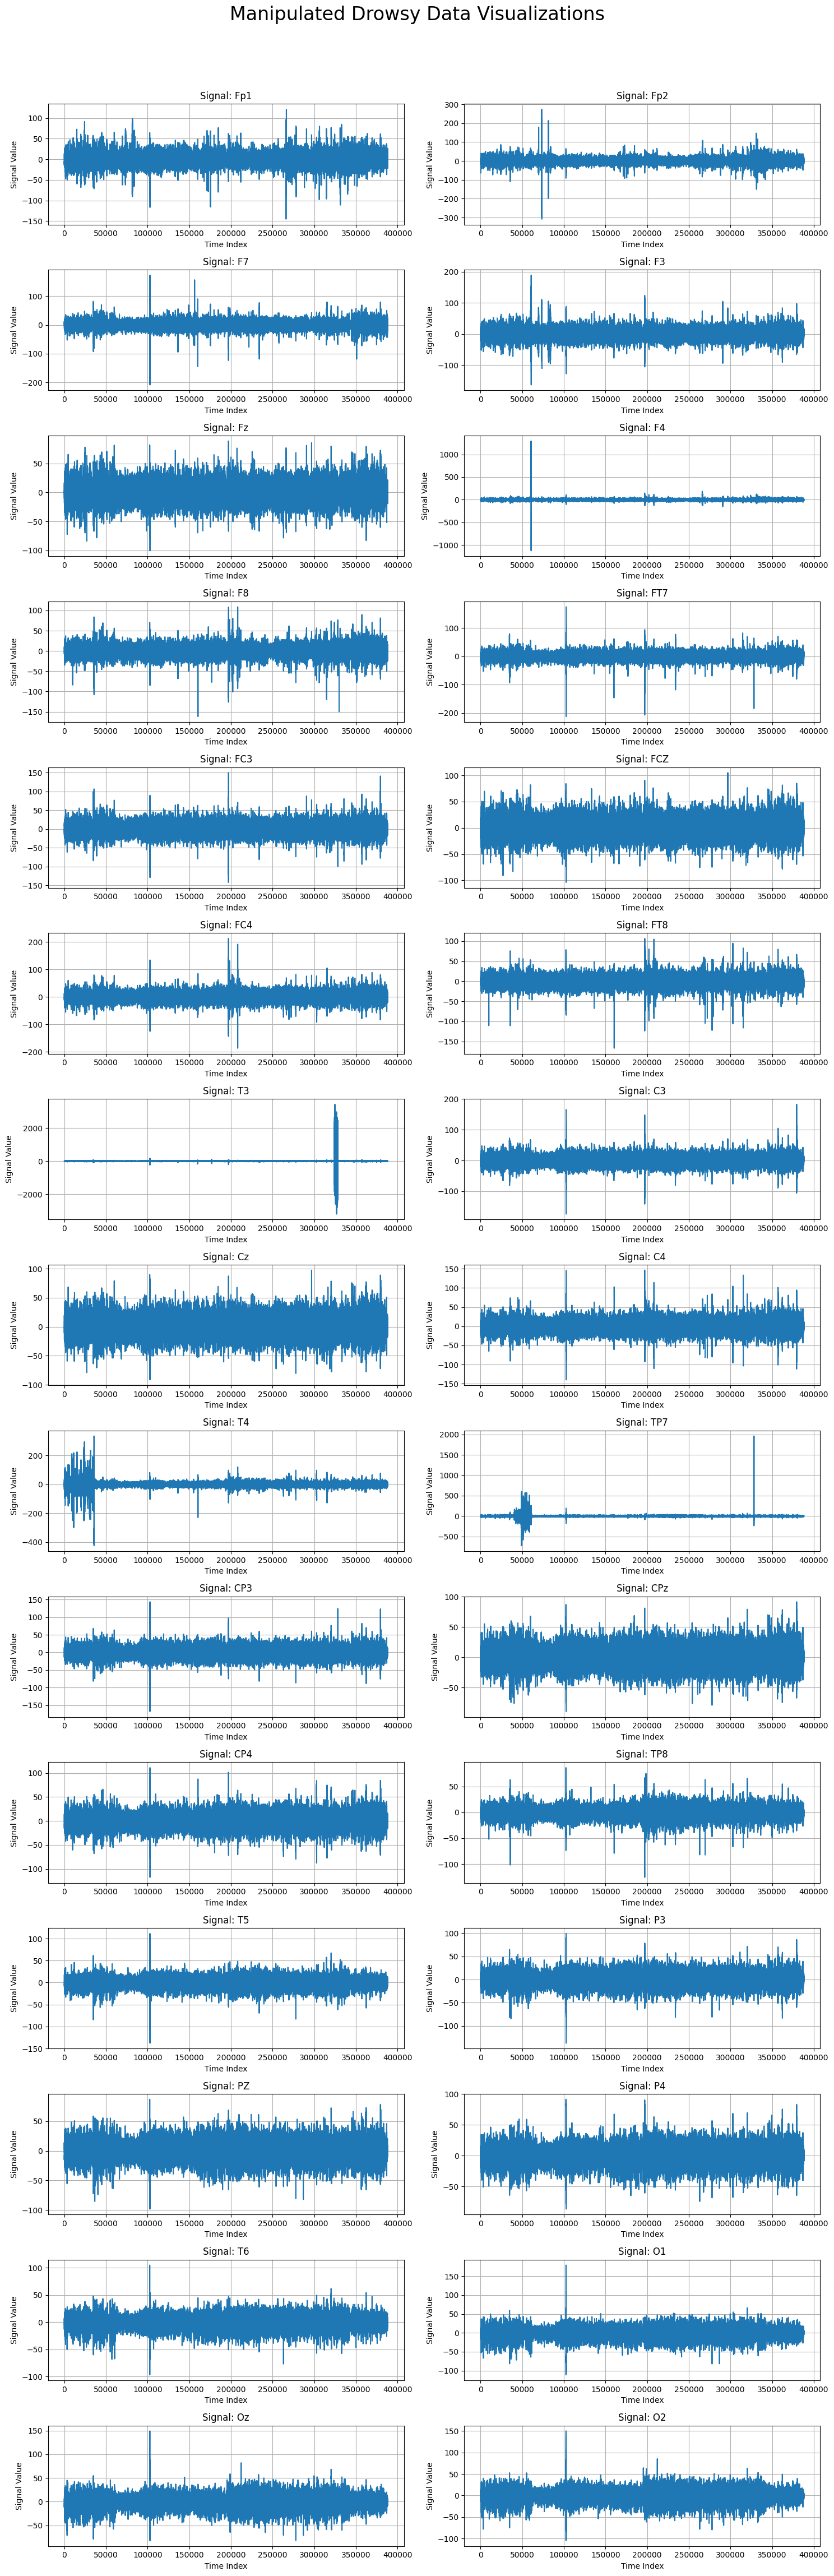

In [34]:
columns_of_interest = Manipulated_drowsy_data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_drowsy_data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Drowsy Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Creating new Manipulated EEG Data

In [35]:
# Concatenate them row-wise
Manipulated_EEG_Data = pd.concat([Manipulated_Alert_Data, Manipulated_drowsy_data], ignore_index=True)

Manipulated_EEG_Data = pd.DataFrame(Manipulated_EEG_Data)

Manipulated_EEG_Data

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
0,4.080976,3.786023,8.346804,6.719097,8.357521,8.916676,6.862104,9.614278,8.955653,11.076102,...,4.477457,1.590643,8.856600,6.898189,3.846108,1.618809,1.528848,-1.199498,1.594009,0
1,5.363737,6.188060,8.691601,6.594982,7.950093,8.835506,7.987136,8.394441,7.126653,8.356511,...,2.415757,1.918520,7.423708,3.755487,1.427838,-0.657721,0.793796,-1.544962,1.900514,0
2,2.168923,1.727106,-0.010906,10.583628,2.440252,1.746089,1.159202,-1.002561,7.059705,1.720240,...,-4.692833,4.261903,3.151329,-1.637562,-5.816451,-8.913891,-1.451266,-4.319859,-4.644263,0
3,6.682761,4.633752,2.093427,16.253235,6.105603,3.943814,4.016592,2.393903,17.343024,6.441727,...,0.839859,2.543160,7.499411,4.182199,-0.059025,-0.736035,4.434387,3.438641,1.207515,0
4,9.795314,8.723788,10.936554,8.182007,8.306618,7.103265,7.980278,12.270826,9.309045,6.750704,...,2.970653,-0.216052,5.413562,5.600711,2.837383,4.172009,0.202442,1.743480,3.413565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776443,6.868306,2.037630,10.935329,3.053171,2.061508,-2.051896,-6.980084,6.915801,1.292861,-2.156677,...,0.466622,1.703162,0.489967,-0.037224,-1.715912,1.355944,0.816035,0.522263,-0.399985,1
776444,3.248673,-3.479991,8.520732,-0.933774,-2.160580,-5.932663,-12.832424,4.543766,-2.418177,-6.189452,...,-1.080016,2.258167,-0.767202,-2.633476,-5.121715,-0.736463,0.412399,-0.159130,-2.200928,1
776445,5.805058,2.770440,8.983543,1.738981,-0.541900,-8.541175,-8.517280,3.491680,-1.389771,-5.822860,...,-3.365152,3.624552,0.280940,-3.084484,-4.691478,-3.197477,0.923831,1.341110,-1.338262,1
776446,7.142978,0.775242,9.888220,4.223264,0.790337,-6.479811,-12.121178,4.921120,0.083320,-4.330250,...,-2.798542,4.248466,1.042023,-2.643634,-3.409195,-2.482608,1.644079,1.565844,-0.301095,1


In [36]:
Manipulated_EEG_Data.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FT7,FC3,FCZ,...,TP8,T5,P3,PZ,P4,T6,O1,Oz,O2,substate
count,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,...,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.0
mean,-0.021618,-0.040802,-0.004570,-0.055523,-0.068220,-0.066261,-0.053505,-0.011565,-0.053644,-0.060294,...,-0.017509,-0.026515,-0.049814,-0.049215,-0.048120,-0.014090,-0.008072,-0.014516,-0.006941,0.5
std,14.620990,14.905172,9.671696,23.275682,10.725436,22.324431,11.260219,8.925568,10.520814,11.073835,...,7.917922,7.899842,9.362213,9.966547,9.443160,7.901001,9.166132,8.790766,9.168400,0.5
min,-573.236473,-1299.322323,-208.160484,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-5.350544,-5.673096,-4.867582,-5.980532,-6.031645,-6.040908,-5.034842,-4.501781,-5.895260,-6.349755,...,-3.989990,-4.059459,-5.113621,-5.467732,-5.173702,-4.049075,-4.513315,-4.367126,-4.517431,0.0
50%,-0.156583,-0.151739,-0.057676,-0.110664,-0.136852,-0.094769,-0.051081,-0.000729,-0.110086,-0.133952,...,0.042863,0.049731,-0.028798,-0.051791,-0.036366,0.070813,0.095885,0.052832,0.077466,0.5
75%,5.073020,5.396961,4.732961,5.728880,5.750800,5.840688,4.904647,4.418808,5.661637,6.091726,...,4.026763,4.130372,5.037588,5.361387,5.104271,4.161815,4.700240,4.482325,4.689910,1.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1294.240965,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,179.167203,149.156242,149.996483,1.0


In [37]:
Manipulated_EEG_Data.shape

(776448, 31)

In [38]:
Manipulated_EEG_Data["substate"].value_counts()

0    388224
1    388224
Name: substate, dtype: int64

# Shuffle Dataset

In [39]:
from sklearn.utils import shuffle

# Shuffle the combined dataset
shuffled_data = shuffle(Manipulated_EEG_Data, random_state=42)

# Display the resulting shuffled DataFrame
print(shuffled_data.head())

              Fp1        Fp2         F7         F3         Fz         F4  \
31373    5.460428  -3.066587  -3.532103  -1.110469  -6.700512  -8.316468   
503322  12.420906   7.892977   9.381983  14.989455  12.890152  11.991087   
192821   3.567581   0.978281   3.602390   4.322111   0.482312  -1.411822   
604921  -1.851140  -1.331449 -10.348099  -3.594288   1.384246  -0.233903   
110346  10.798275  11.522239   6.019171  15.047486  19.901051  18.345793   

               F8        FT7        FC3        FCZ  ...       TP8         T5  \
31373   -2.177149  -3.575548  -0.547252  -4.289519  ... -0.087546   8.608615   
503322   9.227291   9.269211  15.106608  14.326012  ...  4.591299   4.132691   
192821   0.982952   1.553250   2.936996  -0.613808  ...  4.501877   5.587038   
604921  -4.328103 -10.384296  -4.520443  -3.596988  ...  2.923281 -13.530773   
110346  11.812476   5.028844  15.357218  23.189837  ...  9.999357   1.317686   

              P3         PZ        P4        T6        O1     

# Machine Learning Algorithms

In [40]:
import time
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [41]:
data = shuffled_data

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialization 

In [42]:
# Initialize Classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(tree_method='gpu_hist'), 
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

In [43]:
# Initialize Evaluation Metrics
evaluation_metrics = {name: {'Accuracy': None, 'Precision': None, 'Recall': None, 'F1-score': None, 'AUC-ROC': None} for name in classifiers}
training_times = {}
confusion_matrices = {}
classification_reports = {}

In [44]:
def safe_metric_calculation(metric_function, true_values, predictions, **kwargs):
    try:
        return metric_function(true_values, predictions, **kwargs)
    except ValueError as e:
        print(f"Error calculating metric: {e}")
        return None

# Machine Learning Evaluation 

In [45]:
# Iterate over classifiers
for name, classifier in classifiers.items():
    start_time = time.time()
    classifier.fit(X_train, y_train) 
    end_time = time.time()

    y_pred = classifier.predict(X_test) 

    # Calculate and store evaluation metrics
    evaluation_metrics[name]['Accuracy'] = safe_metric_calculation(accuracy_score, y_test, y_pred)
    evaluation_metrics[name]['Precision'] = safe_metric_calculation(precision_score, y_test, y_pred, zero_division=0)
    evaluation_metrics[name]['Recall'] = safe_metric_calculation(recall_score, y_test, y_pred)
    evaluation_metrics[name]['F1-score'] = safe_metric_calculation(f1_score, y_test, y_pred)
    evaluation_metrics[name]['AUC-ROC'] = safe_metric_calculation(roc_auc_score, y_test, y_pred)

    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred) 
    training_times[name] = end_time - start_time 

# Display results
results_df = pd.DataFrame(evaluation_metrics).T
print("Evaluation Metrics:\n", results_df)

print("\nConfusion Matrices:")
for name, matrix in confusion_matrices.items():
    print(f"\n{name}:")
    print(matrix)

print("\nClassification Reports:")
for name, report in classification_reports.items():
    print(f"\n{name}:")
    print(report)

print("\nTraining Times:")
for name, time_taken in training_times.items():
    print(f"{name}: {time_taken:.2f} seconds")

Evaluation Metrics:
                Accuracy  Precision    Recall  F1-score   AUC-ROC
KNN            0.699440   0.714897  0.663076  0.688012  0.699425
Random Forest  0.705615   0.725094  0.661968  0.692095  0.705598
XGBoost        0.694629   0.716838  0.643015  0.677923  0.694609
Decision Tree  0.608313   0.608041  0.608692  0.608366  0.608314
Extra Trees    0.693728   0.717489  0.638699  0.675805  0.693706

Confusion Matrices:

KNN:
[[57152 20524]
 [26150 51464]]

Random Forest:
[[58197 19479]
 [26236 51378]]

XGBoost:
[[57962 19714]
 [27707 49907]]

Decision Tree:
[[47222 30454]
 [30371 47243]]

Extra Trees:
[[58157 19519]
 [28042 49572]]

Classification Reports:

KNN:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71     77676
           1       0.71      0.66      0.69     77614

    accuracy                           0.70    155290
   macro avg       0.70      0.70      0.70    155290
weighted avg       0.70      0.70      0.70    1

# Visualization Confusion Matrices

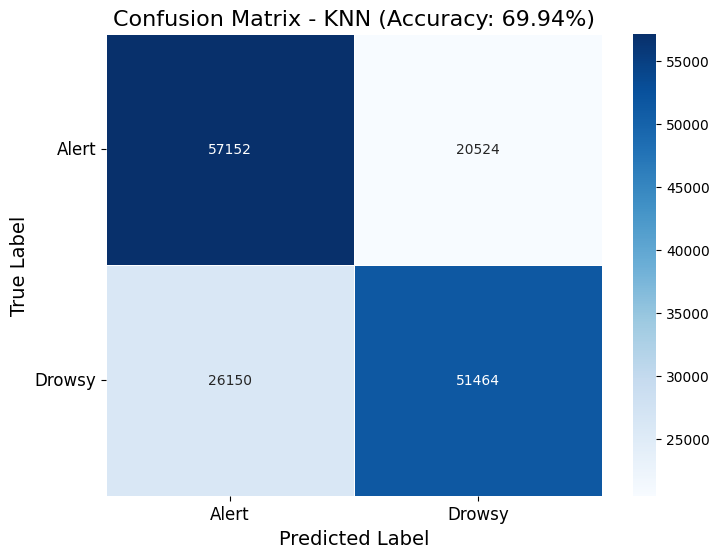

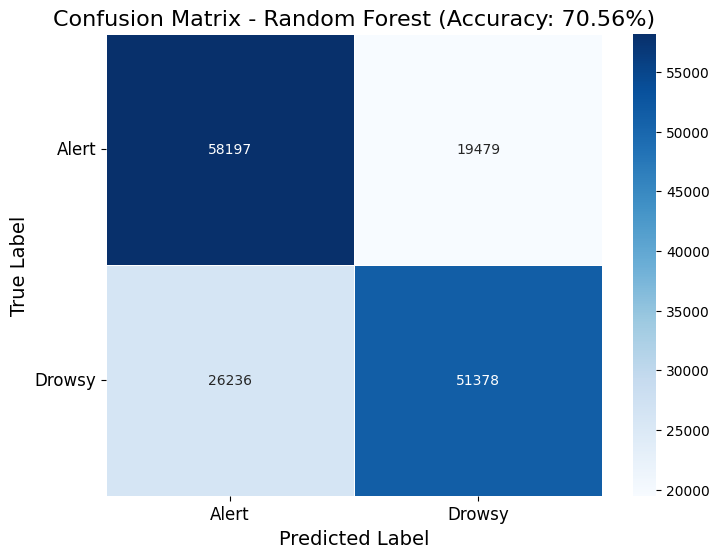

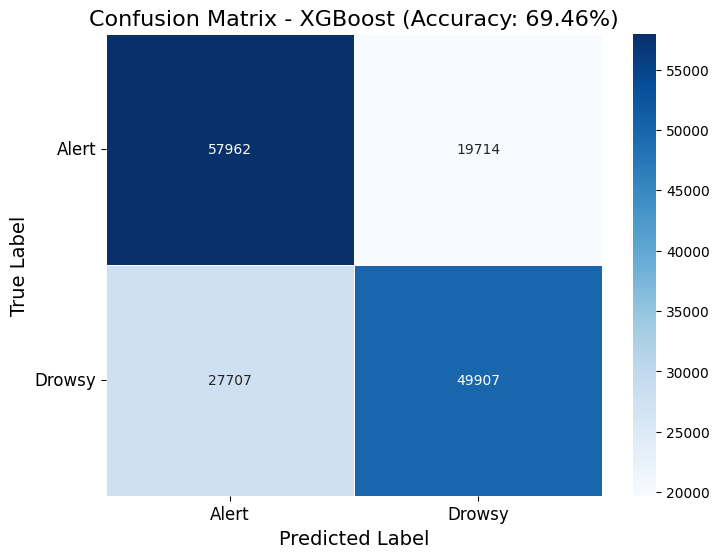

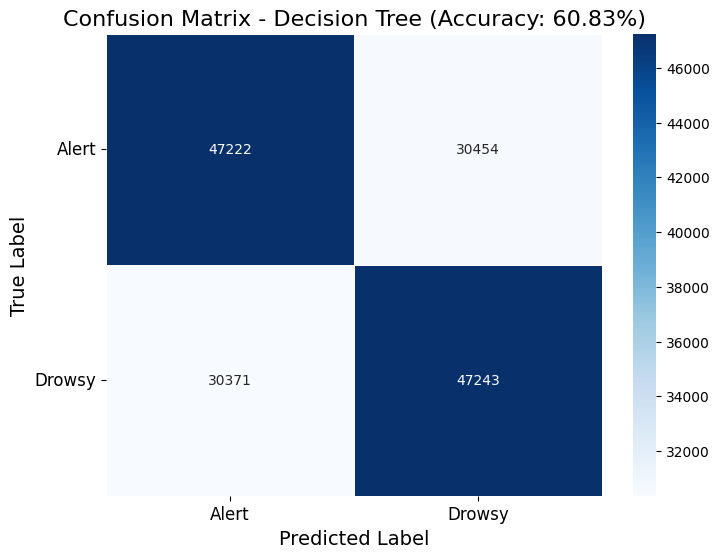

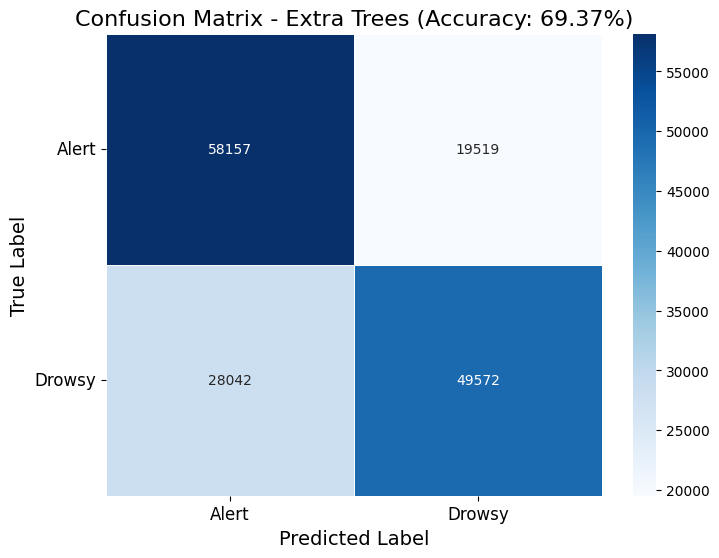

In [46]:
# Define class labels 
class_labels = ["Alert", "Drowsy"]

# Visualization 
for name, matrix in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)
    
    accuracy = evaluation_metrics[name]['Accuracy'] * 100 
    plt.title(f'Confusion Matrix - {name} (Accuracy: {accuracy:.2f}%)', fontsize=16)
    
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    
    plt.xticks(rotation=0, fontsize=12)  
    plt.yticks(rotation=0, fontsize=12)  
    
    plt.show()


# Visualization ROC Curve

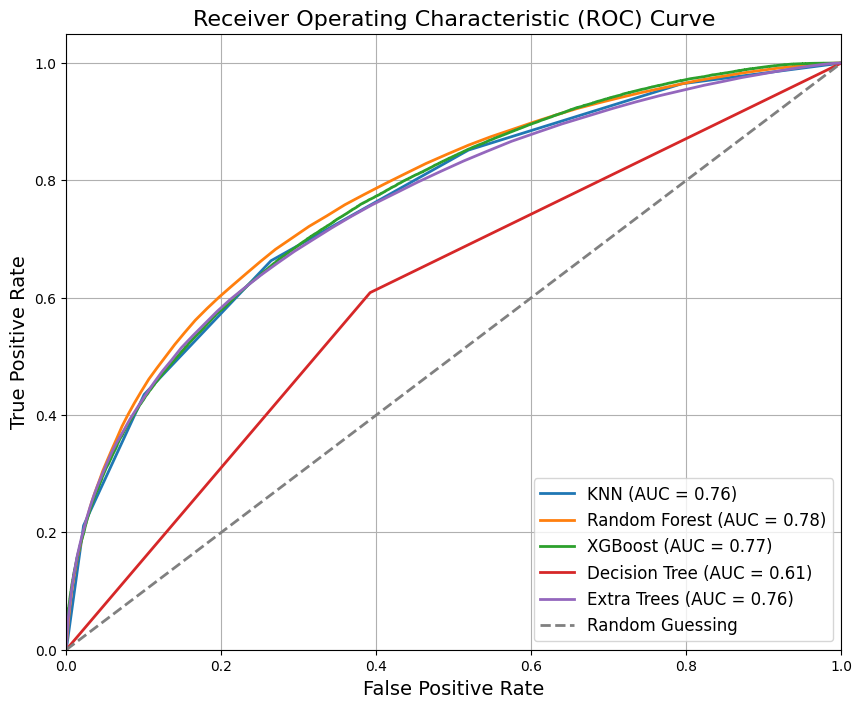

In [47]:
roc_data = {}

# Iterate over classifiers to compute ROC data
for name, classifier in classifiers.items():
    try:
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)  
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc} 
    except Exception as e:
        print(f"An error occurred with classifier {name}: {e}")

# Plotting ROC Curves 
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()